# Creating the Model Grid

This notebook is used to generate and visualize the grids that my model will use. First, import the necessary packages to create the model grid.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

## An's Model of Ha Long Bay and the Surrounding Tonkin Gulf

The grid for An's model will be located in the Tonkin Gulf off the northern coast of Vietnam covering  $18.5^{\circ}-21.5^{\circ}N$, $106^{\circ}-110^{\circ}E$ . The grid spacing will be $1/40^{\circ}$ in the zonal (east-west) direction and $1/40^{\circ}$ in the meridional (north-south) direction, covering a grid of 121 rows and 161 columns. 

In the data file for my model, I will specifiy the following parameters in the `PARM04` namelist in the `data` file:

```
usingSphericalPolarGrid=.TRUE.,
delX=121*0.025,
delY=161*0.025,
xgOrigin=106.0,
ygOrigin=18.5,
```

This grid can be recreated in Python as follows:

In [2]:
# define the parameters that will be used in the data file
delX = 1/40
delY = 1/40
xgOrigin = 106.0
ygOrigin = 18.5
n_rows = 121
n_cols = 161

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX+delX/2, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY/2, delY)
XC, YC = np.meshgrid(xc, yc)

### Visualizing the Grid
The grids above can be visualized as follows:

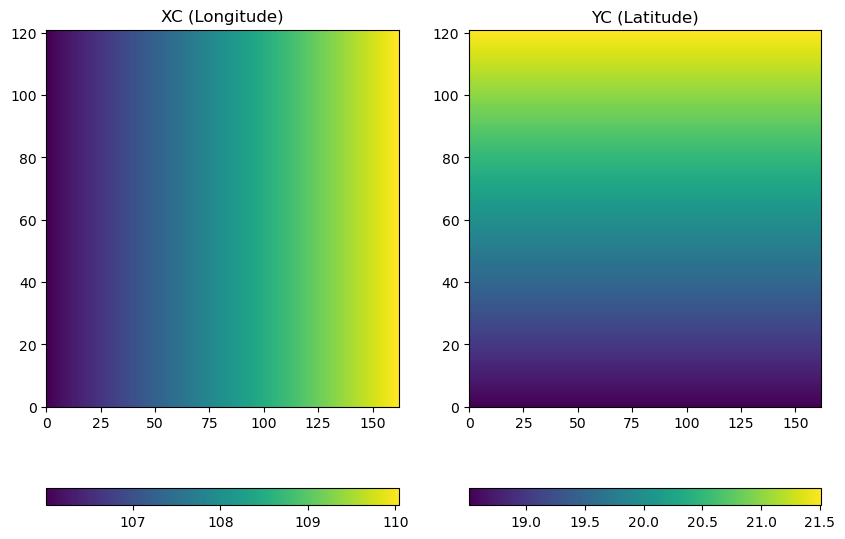

In [3]:
# make a plot of XC and YC
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
C = plt.pcolormesh(XC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('XC (Longitude)')

plt.subplot(1,2,2)
C = plt.pcolormesh(YC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('YC (Latitude)')

plt.show()

### Visualizing the Grid on a Map with Cartopy
Ha Long Bay is located in North Vietnam, in the Tonkin Gulf. To understand the area that we are studying, the below visualization is provided given the model grid.

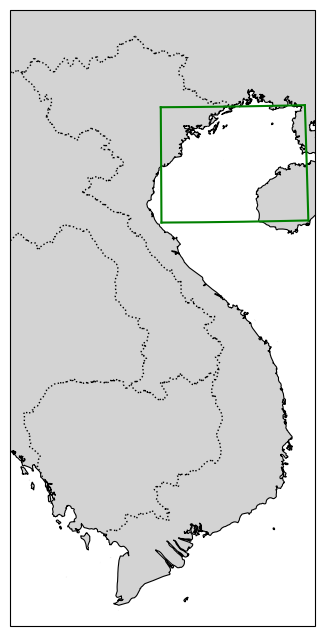

In [4]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.Orthographic(105.0,16.0))

ax.plot(XC[:,0], YC[:,0], 'g-', linewidth=1.5, transform=ccrs.PlateCarree())
ax.plot(XC[:,-1], YC[:,-1], 'g-', linewidth=1.5, transform=ccrs.PlateCarree())
ax.plot(XC[0,:], YC[0,:], 'g-', linewidth=1.5, transform=ccrs.PlateCarree())
ax.plot(XC[-1,:], YC[-1,:], 'g-', linewidth=1.5, transform=ccrs.PlateCarree())

ax.coastlines(resolution='10m', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAND, facecolor='lightgray')
ax.add_feature(cartopy.feature.OCEAN, facecolor='white')

ax.set_extent([102, 110, 8, 24], crs=ccrs.PlateCarree()) 

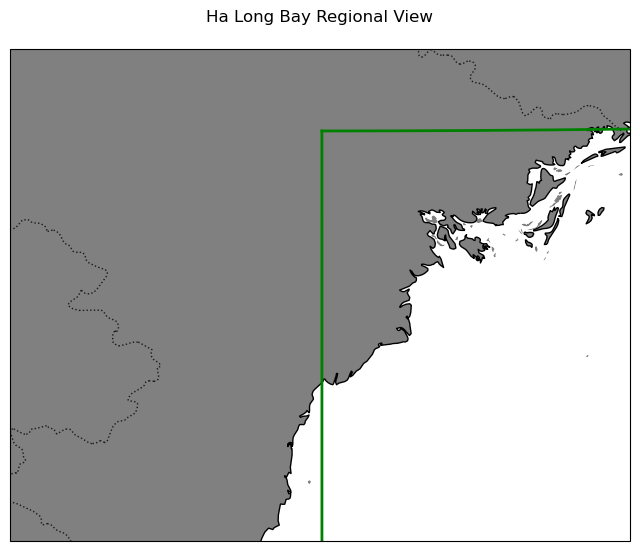

In [5]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=106.0, central_latitude=20.5))

ax.plot(XC[:,0], YC[:,0], 'g-', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(XC[:,-1], YC[:,-1], 'g-', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(XC[0,:], YC[0,:], 'g-', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(XC[-1,:], YC[-1,:], 'g-', linewidth=2, transform=ccrs.PlateCarree())

ax.set_extent([104, 108, 19, 22], crs=ccrs.PlateCarree()) 

ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', alpha=0.8)
ax.add_feature(cartopy.feature.LAND, facecolor='gray')
ax.add_feature(cartopy.feature.OCEAN, facecolor='white')

plt.title("Ha Long Bay Regional View", pad=20)
plt.show()